<a href="https://colab.research.google.com/github/FelipeVillegasH/Tareas_Coding_Dojo_Track2/blob/main/Price_House_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price House Predictions with Bagged Trees and Random forests

## By Felipe Villegas

In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/Track 2/Semana 6/Tareas core/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [81]:
df = df.drop(columns = ['id', 'date'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
X = df.loc[:, df.columns != 'price']
X.shape

(21613, 18)

In [83]:
y = df.loc[:, 'price']
y.shape

(21613,)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

Bagged Tree

In [85]:
Bagged_Tree = BaggingRegressor()
Bagged_Tree.fit(X_train, y_train)

BaggingRegressor()

In [86]:
Bagged_Tree.predict(X_test.iloc[0].values.reshape(-1,18))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([383040.])

In [87]:
Bagged_Tree.predict(X_test.iloc[0:10])

array([ 383040., 1741903.,  726850.,  154200.,  433300.,  600910.,
        234930.,  652020.,  448160.,  437980.])

In [88]:
Bagged_Tree.score(X_train, y_train)

0.9733248548003111

In [89]:
Bagged_Tree.score(X_test, y_test)

0.8703223122303865

Random Forest

In [90]:
Random_Forest = RandomForestRegressor(n_estimators=190)
Random_Forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=190)

In [91]:
Random_Forest.score(X_train, y_train)

0.9815294395081915

In [92]:
Random_Forest.predict(X_test.iloc[0].values.reshape(-1,18))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([407815.13157895])

In [93]:
Random_Forest.predict(X_test.iloc[0:10])

array([ 407815.13157895, 1723777.71578947,  721321.99122807,
        148525.78947368,  443570.39736842,  590652.16315789,
        217304.65263158,  641049.65263158,  447036.05263158,
        419590.86315789])

In [94]:
Random_Forest.score(X_test, y_test)

0.8840906569448562

Null Model 

In [95]:
pd.DataFrame(y_train).value_counts(normalize=True)

price    
350000.0     0.008020
450000.0     0.007897
425000.0     0.007280
500000.0     0.007033
325000.0     0.006910
               ...   
450600.0     0.000062
451101.0     0.000062
451555.0     0.000062
452100.0     0.000062
7700000.0    0.000062
Length: 3398, dtype: float64

In [96]:
estimator_range = [1] + list(range(10, 310, 10))
estimator_range

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

In [97]:
clf = RandomForestRegressor(n_estimators=100,
                                 random_state=1,
                                 bootstrap=True)
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

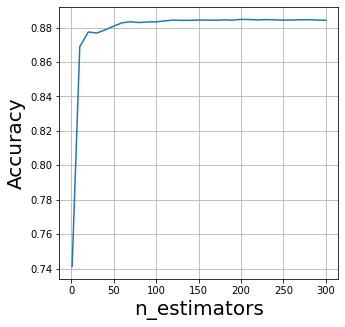

In [98]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

In [99]:
Bestimator = pd.DataFrame(scores)
Bestimator = Bestimator.set_axis(['scores'], axis=1, inplace=False)
Bestimator 

,scores
0,0.741213
1,0.868800
2,0.877387
3,0.876783
4,0.878633
5,0.880777
6,0.882762
7,0.883316
8,0.882901
9,0.883236


In [100]:
Bestimator.sort_values(by='scores', ascending=False, inplace= True)
Bestimator
# top score .8847

,scores
20,0.884735
21,0.884626
23,0.884608
28,0.884548
27,0.884499
24,0.884433
18,0.884399
22,0.884387
26,0.884363
29,0.884348


In [101]:
estimator_range[:20]

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

Most important features of the model

In [102]:
Features = pd.DataFrame({'Feature': X_train.columns, 'Importance': Random_Forest.feature_importances_})
Features.sort_values(by = 'Importance', inplace = True)


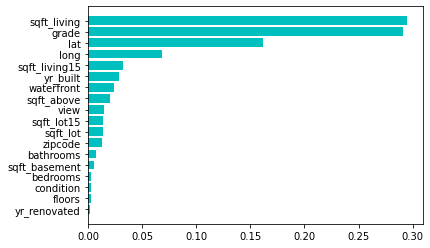

In [103]:
plt.barh(Features['Feature'], 
         Features['Importance'],
         color='c',
         ecolor= 'k'
         );

# The most important variables of the model are the square foot living  and the grade.

# The other parameters that we could have modified are: 
# Estimator number, lenght, and the features to be used by the model.